# Data cleaning of World Developement Indicator 🌎

Here we will study world developement indicators data with the help of data cleaning or data scrubbing.

## Data Cleaning:
Data cleaning is the process of removing incorrect, duplicate or managing any null in the data, and making sure the formatting of data is consistent.

In [46]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [47]:
# To get the location of the directory
os.getcwd()

'/content'

In [3]:
# Create directory
directory = "World Developement Indicator"
parent_dir = '/content'
path = os.path.join(parent_dir, directory)
os.mkdir(path)
print("Directory '%s' is created" %directory)

Directory 'World Developement Indicator' is created


#### After creating the directory we need to upload the csv into the directory and then proceed to the next step. 

In [48]:
# Create dataframe
df = pd.read_csv('/content/World Developement Indicator/WDICountry.csv')

# Searching Null Values
Here, we will search for possible null values that are mainly present in datasets.
Such as:
1.   ' '
2.   **'NaN'**
3.   **'NAN'**
4.   **'N/A'**
5.   **'n/a'**
6.   **'NULL'**
7.   **'null'**

And, then we will create that csv file into a dataframe for easier process of cleaning and modification later.



In [49]:
# List of possible null values might be present inside the dataset
missing_values = [' ', 'NaN', 'NAN', 'N/A', 'n/a', 'NULL', 'null']
df = pd.read_csv('/content/World Developement Indicator/WDICountry.csv', na_values = missing_values)
df

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2019/20","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
261,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,The World Bank systematically assesses the app...,Middle East & North Africa,Low income,RY,...,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2015.0,NaN
262,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2016","Expenditure survey/budget survey (ES/BS), 2014/15",NaN,2007,2010.0,2018.0,NaN
263,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data were rebased to reflect...,Sub-Saharan Africa,Low income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2020 (expected),"Demographic and Health Survey, 2018","Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2018.0,NaN


## Let's count no. of null values in each column

In [50]:
# Total number of null values in each column
df.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           2
Currency Unit                                         48
Special Notes                                        139
Region                                                48
Income Group                                          49
WB-2 code                                              1
National accounts base year                           57
National accounts reference year                     192
SNA price valuation                                   58
Lending category                                     121
Other groups                                         206
System of National Accounts                           57
Alternative conversion factor                        265
PPP survey year                

## Visualizing it in a heatmap

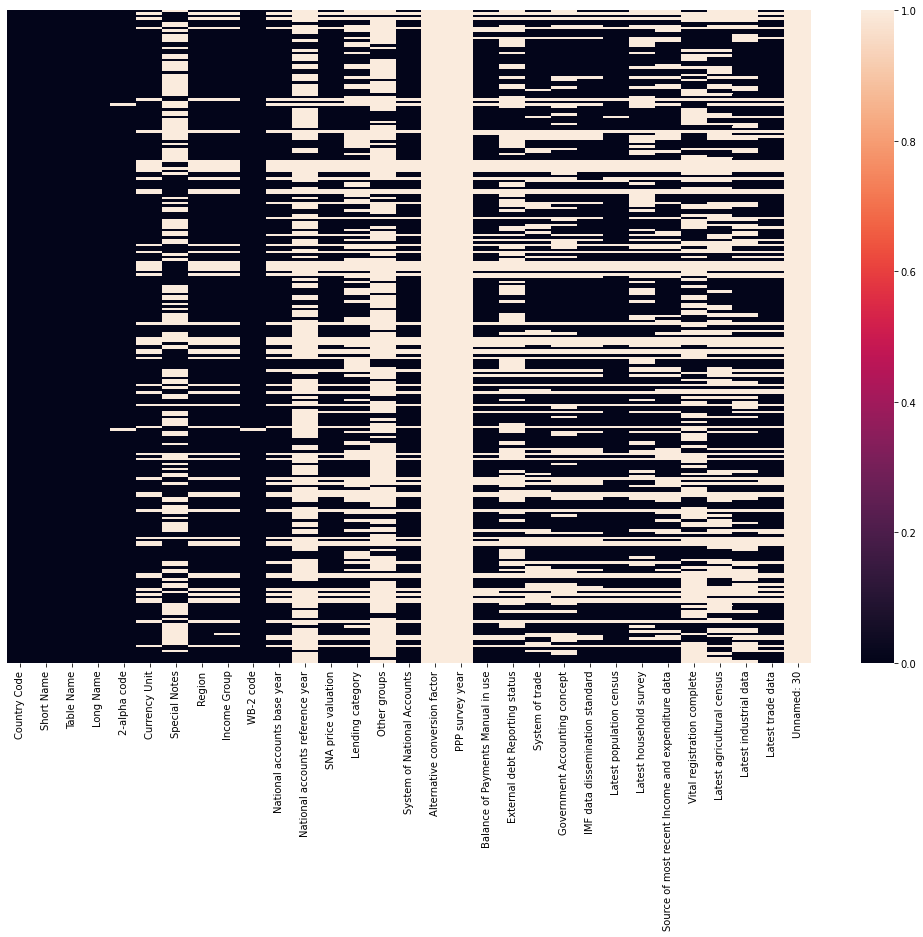

In [51]:
# To change the size of heatmap
plt.figure(figsize=(18,12))

# to plot heatmap
plot = sns.heatmap(df.isnull(), yticklabels = False)

# When dataset is small, we can use another parameter inside heatmap() method called, 'annot'.
# And set it to 'True', so the values having light part will be highlighted as 1, whereas
# the dark parts will highlight as 0.

From the heatmap, we can see that the dark color represents *zero* null value whereas the light color represents *single* null value in the respective columns.

**So, more the amount of light color parts refers more null values.
And, less or no light color parts refers less or no null values.**

From our observation, first four columns:
*   **'Country Code'**
*   **'Short Name'**
*   **'Table Name'**
*   **'Long Name'**
doesn't have any null values.

Whereas, highest null values are present in:
*   **'Alternative conversion factor'**
*   **'PPP survey year'**
*   **'PPP survey year'**

## Removing rows and columns having null values: 
After checking the *WDICountry.csv* manually, we found that there are a lot of rows having more than 19 null columns. So we will clean the dataset by:  
1.   Removing all the rows having more than 19 null values using *thresh* parameter of *dropna()* method from the original dataset.
2.   And from the resulting dataset, removing all the column having null values using *axis* parameter of *dropna()* method.

In [52]:
# Drop rows with missing values more than 19 in each row
drop_rows = df.dropna(thresh = 19)
final_cleaned_data = drop_rows.dropna(axis = 1)
final_cleaned_data

,Country Code,Short Name,Table Name,Long Name,Currency Unit,Region,National accounts base year,System of National Accounts
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,Afghan afghani,South Asia,2016,Country uses the 1993 System of National Accou...
4,AGO,Angola,Angola,People's Republic of Angola,Angolan kwanza,Sub-Saharan Africa,2002,Country uses the 1993 System of National Accou...
5,ALB,Albania,Albania,Republic of Albania,Albanian lek,Europe & Central Asia,Original chained constant price data are resca...,Country uses the 2008 System of National Accou...
8,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,U.A.E. dirham,Middle East & North Africa,2010,Country uses the 1993 System of National Accou...
9,ARG,Argentina,Argentina,Argentine Republic,Argentine peso,Latin America & Caribbean,2004,Country uses the 2008 System of National Accou...
...,...,...,...,...,...,...,...,...
260,XKX,Kosovo,Kosovo,Republic of Kosovo,Euro,Europe & Central Asia,Original chained constant price data are resca...,Country uses the 2008 System of National Accou...
261,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,Yemeni rial,Middle East & North Africa,1990,Country uses the 1993 System of National Accou...
262,ZAF,South Africa,South Africa,Republic of South Africa,South African rand,Sub-Saharan Africa,2015,Country uses the 2008 System of National Accou...
263,ZMB,Zambia,Zambia,Republic of Zambia,New Zambian kwacha,Sub-Saharan Africa,2010,Country uses the 2008 System of National Accou...


# New csv file for cleaned data
Here, we will create a new csv file for the cleaned dataset using *to_csv()* method.

In [45]:
# Creating a new csv file for cleaned data
final_cleaned_data.to_csv('WDICountry(Cleaned).csv', encoding = 'UTF8', index = False)

# Yayy!!! Data is cleaned.🥳
We can also create exploratory data analysis from this new created dataset.